In [38]:
%load_ext autoreload
%autoreload 2
import numpy as np
from rentorbuy import RentOrBuy
from asset import annual_to_monthly_stdev, annual_to_monthly_return

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Insert variables
- `monthly_rent`: the monthly rent of an apartment similar to the one you want to buy.
- `house_price`: the price which you expect to pay for the house, i.e. listed price + overbid.
- `additional_monthly_costs`: any additional costs of ownership, e.g. condo fees.
- `additional_purchase_costs`: They include legal fees, title insurance, home inspection, home appraisal, etc.
- `down_payment`: the downpayment you expect to put on your mortgage.
- `mortgage_apr`: the interest on your mortgage in percentage, e.g. $5\%$ (including fees). The interest is assumed to be fixed for the whole loan term.
- `mortgage_amortization_years`: the years that will take you to repay the mortgage.
- `mortgage_additional_payments`: the monthly additional amount that you intend to use to repay your mortgage.
- `maintenance_cost`: the yearly maintenance costs as a percentage of the `house_price`.
- `monthly_property_tax_rate`: the monthly property tax on your house (annual property tax divided by 12).
- `annual_inflation`: the expected avg. annual rate of inflation over the term of the loan.
- `return_ret`: the expected avg. annual return of real estate investements in the area where you are planning to buy over the `mortgage_term`.

- `housing_asset_dict`: distribution of expected monthly returns on real estate (e.g. based on historical data).
- `investment_asset_dict`: distribution of expected monthly returns on alternative investment to real estate (e.g. low cost index fund).

### TODO
- Take into account tax discount on mortgage interest and purchase costs
- Take into account costs of selling the house
- Improve visualization

In [47]:
mgt = RentOrBuy(
    monthly_rent=2000,
    house_price=565000,
    down_payment=0,
    mortgage_amortization_years=30,
    mortgage_apr=0.0464,
    additional_purchase_costs=20000,
    additional_monthly_costs=300,
    mortgage_additional_payments=0,
    annual_inflation=0.02,
    monthly_property_tax_rate=0.000042,
    maintenance_cost=0.01,
    housing_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.0735), 
            "scale":  annual_to_monthly_stdev(0.0860)}
    },
    investment_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.0764), 
            "scale":  annual_to_monthly_stdev(0.192)}
    },
)

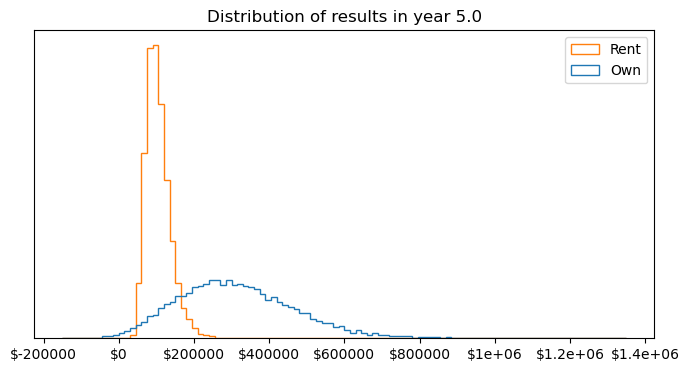

In [48]:
mgt.histogram(period=60)

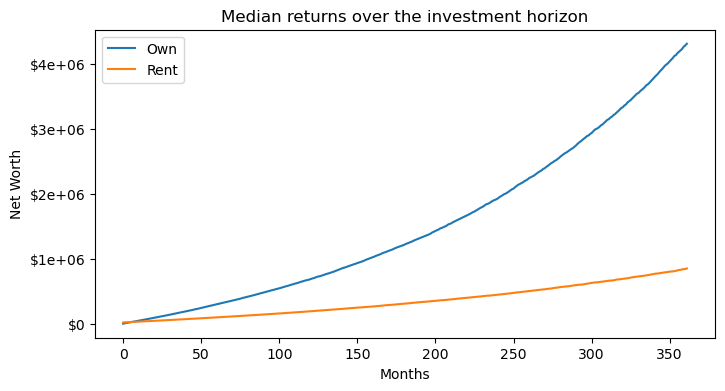

In [49]:
mgt.median_returns_plot()

In [50]:
mgt.mortgage_df

,Begin_balance,Payment,Principal,Interest,Additional_payment,End_balance,total_payment
Date,,,,,,,
2022-11-01,565000.00,2310.96,1000.25,1310.71,0,563999.75,2310.96
2022-12-01,563999.75,2310.96,1002.57,1308.39,0,562997.18,2310.96
2023-01-01,562997.18,2310.96,1004.90,1306.06,0,561992.28,2310.96
2023-02-01,561992.28,2310.96,1007.23,1303.73,0,560985.05,2310.96
2023-03-01,560985.05,2310.96,1009.57,1301.39,0,559975.48,2310.96
...,...,...,...,...,...,...,...
2052-08-01,10097.76,2310.96,2287.53,23.43,0,7810.23,2310.96
2052-09-01,7810.23,2310.96,2292.84,18.12,0,5517.39,2310.96
2052-10-01,5517.39,2310.96,2298.16,12.80,0,3219.23,2310.96
